In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

#Configs
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
sns.set_style("whitegrid")




Formato do DataFrame (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Contagem das classes
target
0    50
1    50
2    50
Name: count, dtype: int64


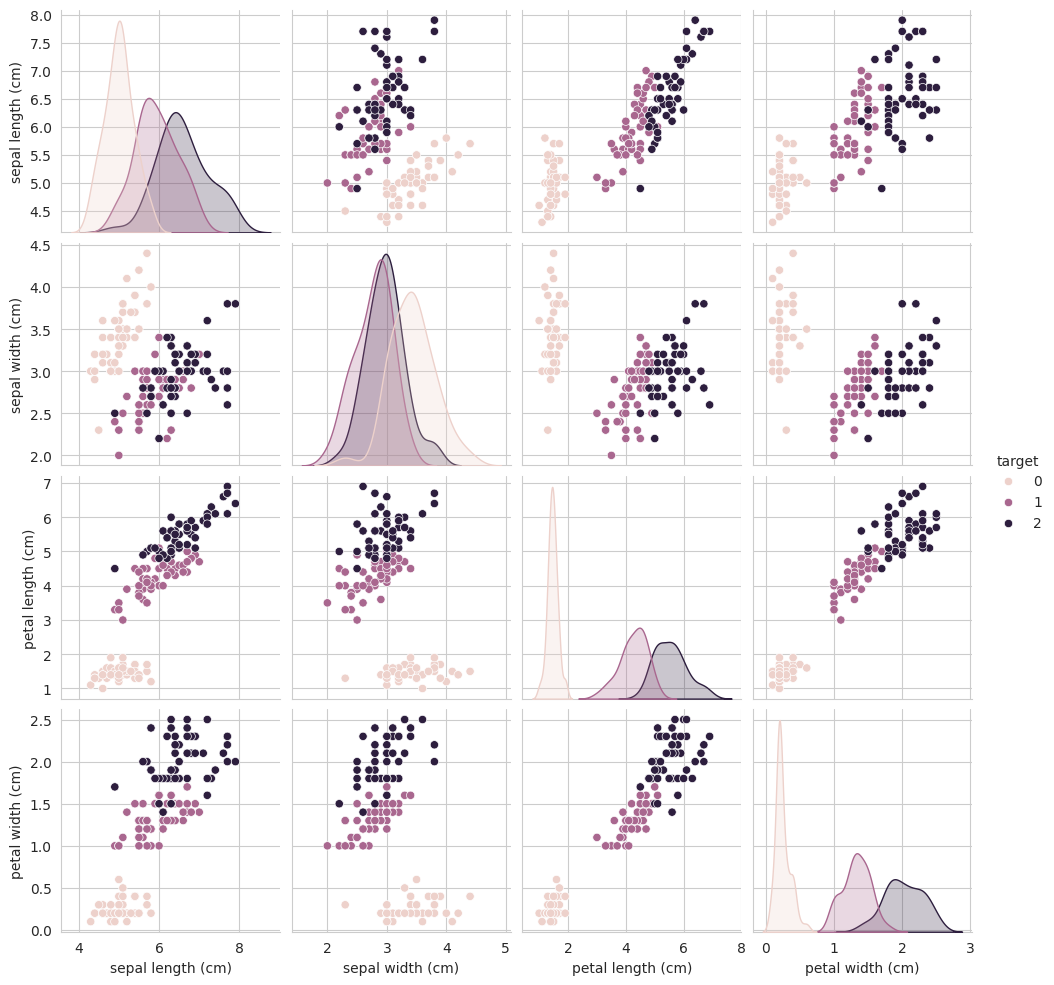

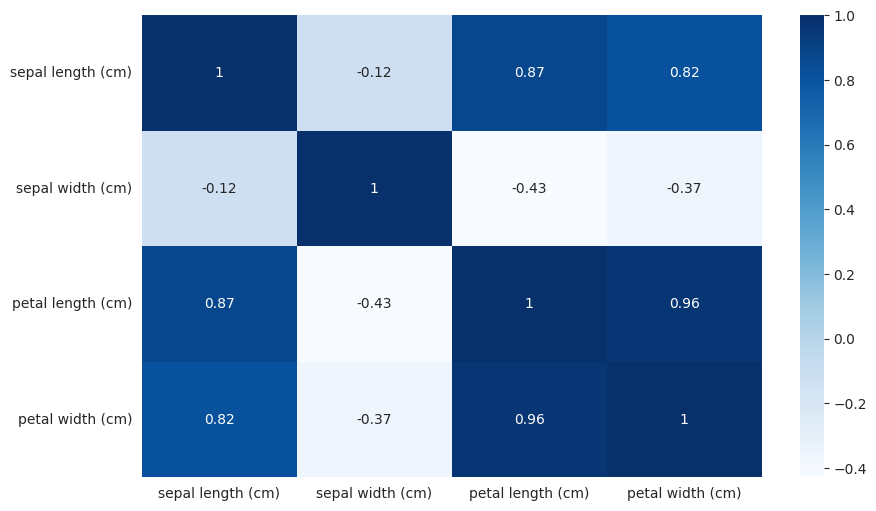

In [30]:
# Carregar o dataset IRIS
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
#Criar DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

#Verificar dimensões
print("Formato do DataFrame", df.shape)

#Mostrar primeiras linhas
display(df.head())

# Estatísticas descritivas
display(df.describe())

#Distribuição das Classes
print("Contagem das classes")
print(df['target'].value_counts())

# Pairplot (pode demorar um pouco)
sns.pairplot(df, hue='target')
plt.show()

#Mapa de calor de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='Blues')
plt.show()

In [22]:
# Divisão estratificada inicial (60% treino, 40% temporário)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    stratify=y,
    random_state=RANDOM_STATE
)

#Divisão do temporário em validação (20%) e teste (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=RANDOM_STATE
)

# Verificando as proporções
print("Tamanho treino:", X_train.shape)
print("Tamanho validação:", X_val.shape)
print("Tamanho teste:", X_test.shape)

print("\nDistribuição das classes em cada subconjunto:")
print("Treino:", np.bincount(y_train))
print("Validação:", np.bincount(y_val))
print("Teste:", np.bincount(y_test))


Tamanho treino: (90, 4)
Tamanho validação: (30, 4)
Tamanho teste: (30, 4)

Distribuição das classes em cada subconjunto:
Treino: [30 30 30]
Validação: [10 10 10]
Teste: [10 10 10]


In [23]:
# Inicializar o scaler
scaler = StandardScaler()

#Ajustar (fit) apenas no conjunto de treino
scaler.fit(X_train)

#tTransformar os 3 conjuntos
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Normalização concluída")
print("Média após scaling (treino)", X_train_scaled.mean(axis=0))
print("Desvio padrão ap[os scaling (treino)", X_train_scaled.std(axis=0))


Normalização concluída
Média após scaling (treino) [-7.57418819e-16 -6.19566127e-16 -5.74848811e-16  2.24511767e-16]
Desvio padrão ap[os scaling (treino) [1. 1. 1. 1.]


In [24]:
# Modelo 1 — MLP simples
mlp_A = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=RANDOM_STATE
)

# Modelo 2 — MLP maior + early stopping
mlp_B = MLPClassifier(
    hidden_layer_sizes=(50, 20),
    activation='relu',
    solver='adam',
    early_stopping=True,
    n_iter_no_change=10,
    max_iter=1000,
    random_state=RANDOM_STATE
)

# Modelo 3 — SVM Linear
svm_linear = SVC(
    kernel='linear',
    C=1.0,
    random_state=RANDOM_STATE
)

# Modelo 4 — SVM RBF
svm_rbf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=RANDOM_STATE
)

print("Modelos definidos!")


Modelos definidos!


In [25]:
tempos_treino = {}
modelos = {
    "MLP_A": mlp_A,
    "MLP_B": mlp_B,
    "SVM_Linear": svm_linear,
    "SVM_RBF": svm_rbf
}

for nome, modelo in modelos.items():
    print(f"Treinando {nome}...")
    inicio = time.perf_counter()
    modelo.fit(X_train_scaled, y_train)
    fim = time.perf_counter()
    tempos_treino[nome] = fim - inicio
    print(f"{nome} treinado em {fim - inicio:.4f} segundos.")


Treinando MLP_A...
MLP_A treinado em 0.3670 segundos.
Treinando MLP_B...
MLP_B treinado em 0.0371 segundos.
Treinando SVM_Linear...
SVM_Linear treinado em 0.0016 segundos.
Treinando SVM_RBF...
SVM_RBF treinado em 0.0013 segundos.


In [26]:
resultados = {}

for nome, modelo in modelos.items():
  y_pred = modelo.predict(X_test_scaled)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, average='macro')
  rec = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')

  resultados[nome] = {
      "Acurácia": acc,
      "Precisão": prec,
      "Recall": rec,
      "F1-Score": f1,
  }

  print(f"=== {nome} ===")
  print("Acurácia:", acc)
  print("Precisão", prec)
  print("Recall", prec)
  print("F1", f1_score)
  print("\nClassificação por classe:")
  print(classification_report(y_test, y_pred))
  print("-"*50)

=== MLP_A ===
Acurácia: 0.9666666666666667
Precisão 0.9696969696969697
Recall 0.9696969696969697
F1 <function f1_score at 0x78cc4d03c360>

Classificação por classe:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

--------------------------------------------------
=== MLP_B ===
Acurácia: 0.7666666666666667
Precisão 0.8627450980392157
Recall 0.8627450980392157
F1 <function f1_score at 0x78cc4d03c360>

Classificação por classe:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.59      1.00      0.74        10
           2       1.00      0.30      0.46        10

    accuracy        

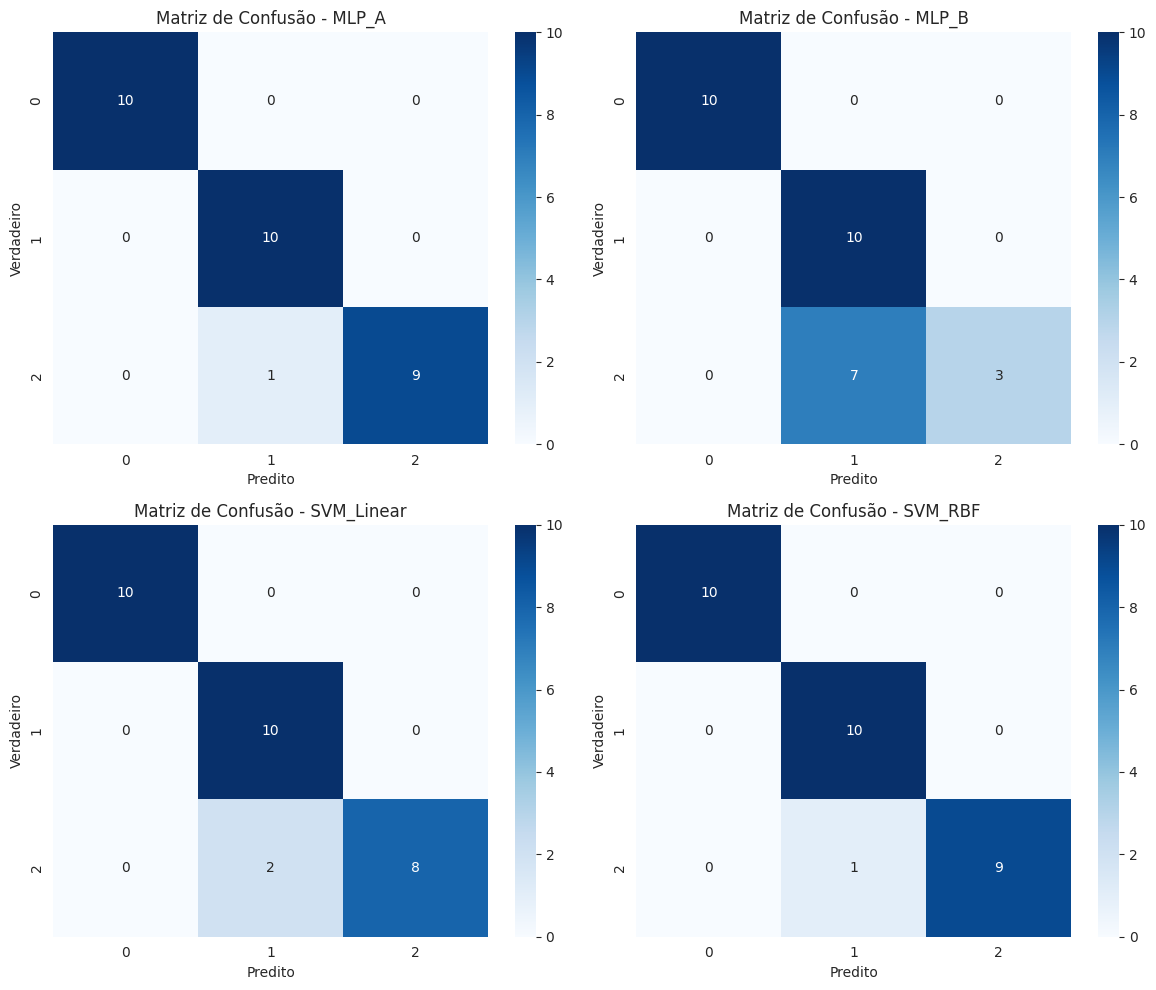

In [27]:
plt.figure(figsize=(12, 10))

for i, (nome, modelo) in enumerate(modelos.items(), 1):
    y_pred = modelo.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")

plt.tight_layout()
plt.show()

In [31]:
df_results = pd.DataFrame(resultados).T
df_results["tempo_treino"] = df_results.index.map(tempos_treino)

display(df_results)

#Salvar como csv para colocar no artigo
df_results.to_csv("Resultados_finais.csv", index=True)
print(df_results.to_latex(index=True))

,Acurácia,Precisão,Recall,F1-Score,tempo_treino
MLP_A,0.966667,0.969697,0.966667,0.966583,0.367021
MLP_B,0.766667,0.862745,0.766667,0.734093,0.037061
SVM_Linear,0.933333,0.944444,0.933333,0.932660,0.001560
SVM_RBF,0.966667,0.969697,0.966667,0.966583,0.001345


\begin{tabular}{lrrrrr}
\toprule
 & Acurácia & Precisão & Recall & F1-Score & tempo_treino \\
\midrule
MLP_A & 0.966667 & 0.969697 & 0.966667 & 0.966583 & 0.367021 \\
MLP_B & 0.766667 & 0.862745 & 0.766667 & 0.734093 & 0.037061 \\
SVM_Linear & 0.933333 & 0.944444 & 0.933333 & 0.932660 & 0.001560 \\
SVM_RBF & 0.966667 & 0.969697 & 0.966667 & 0.966583 & 0.001345 \\
\bottomrule
\end{tabular}



In [29]:
tempos_inferencia = {}
parametros = {}
for nome, modelo in modelos.items():
    inicio = time.perf_counter()
    modelo.predict(X_test_scaled)
    fim = time.perf_counter()
    tempos_inferencia[nome] = (fim - inicio) / len(X_test_scaled)


    #Número de parâmetros (MLP)
    if "MLP" in nome:
      total_params = 0
      for w, b in zip(modelo.coefs_, modelo.intercepts_):
        total_params += w.size + b.size
      parametros[nome] = total_params
    else:
      # Para SVM, contar vetores de suporte
      parametros[nome] = modelo.support_vectors_.shape[0]

print("Tempos de inferência:", tempos_inferencia)
print("Parâmetros / Vetores de Suporte:", parametros)

Tempos de inferência: {'MLP_A': 2.4111899998994584e-05, 'MLP_B': 1.5703700000813114e-05, 'SVM_Linear': 2.9303833328716186e-05, 'SVM_RBF': 2.0307366670143288e-05}
Parâmetros / Vetores de Suporte: {'MLP_A': 83, 'MLP_B': 1333, 'SVM_Linear': 20, 'SVM_RBF': 39}
